Step 1/2:

The usual load all the libraries and the datasets + cleaning NaN values

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

enc = LabelEncoder()
sca=StandardScaler()

df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [90]:
df=df.replace(r'^\s*$', np.nan, regex=True)
df.dropna(inplace=True,axis=0)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [91]:
Xprep = df.copy()
Xprep = Xprep.drop(['charges'], axis = 1)
y= df[['charges']]
Xprep

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


Step 3: Encoding and Scaling the individual pieces

In [92]:
Xprep['sex']= enc.fit_transform(Xprep.sex.values)
Xprep['smoker']= enc.fit_transform(Xprep.smoker.values)
Xprep['region']= enc.fit_transform(Xprep.region.values)
Xprep

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [93]:
Xprep['bmi']= sca.fit_transform(np.array(Xprep['bmi']).reshape(-1,1))
Xprep['age']= sca.fit_transform(np.array(Xprep['age']).reshape(-1,1))
Xprep

,age,sex,bmi,children,smoker,region
0,-1.438764,0,-0.453320,0,1,3
1,-1.509965,1,0.509621,1,0,2
2,-0.797954,1,0.383307,3,0,2
3,-0.441948,1,-1.305531,0,0,1
4,-0.513149,1,-0.292556,0,0,1
...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,1
1334,-1.509965,0,0.206139,0,0,0
1335,-1.509965,0,1.014878,0,0,2
1336,-1.296362,0,-0.797813,0,0,3


In [94]:
y= sca.fit_transform(y)
y

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [95]:
Xprep['charges']=y
Xprep

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,0.298584
1,-1.509965,1,0.509621,1,0,2,-0.953689
2,-0.797954,1,0.383307,3,0,2,-0.728675
3,-0.441948,1,-1.305531,0,0,1,0.719843
4,-0.513149,1,-0.292556,0,0,1,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,1,-0.220551
1334,-1.509965,0,0.206139,0,0,0,-0.914002
1335,-1.509965,0,1.014878,0,0,2,-0.961596
1336,-1.296362,0,-0.797813,0,0,3,-0.930362


Step 4:

Prepares the visualizations asked for(correlation matrix is by far the best one in my opinion)

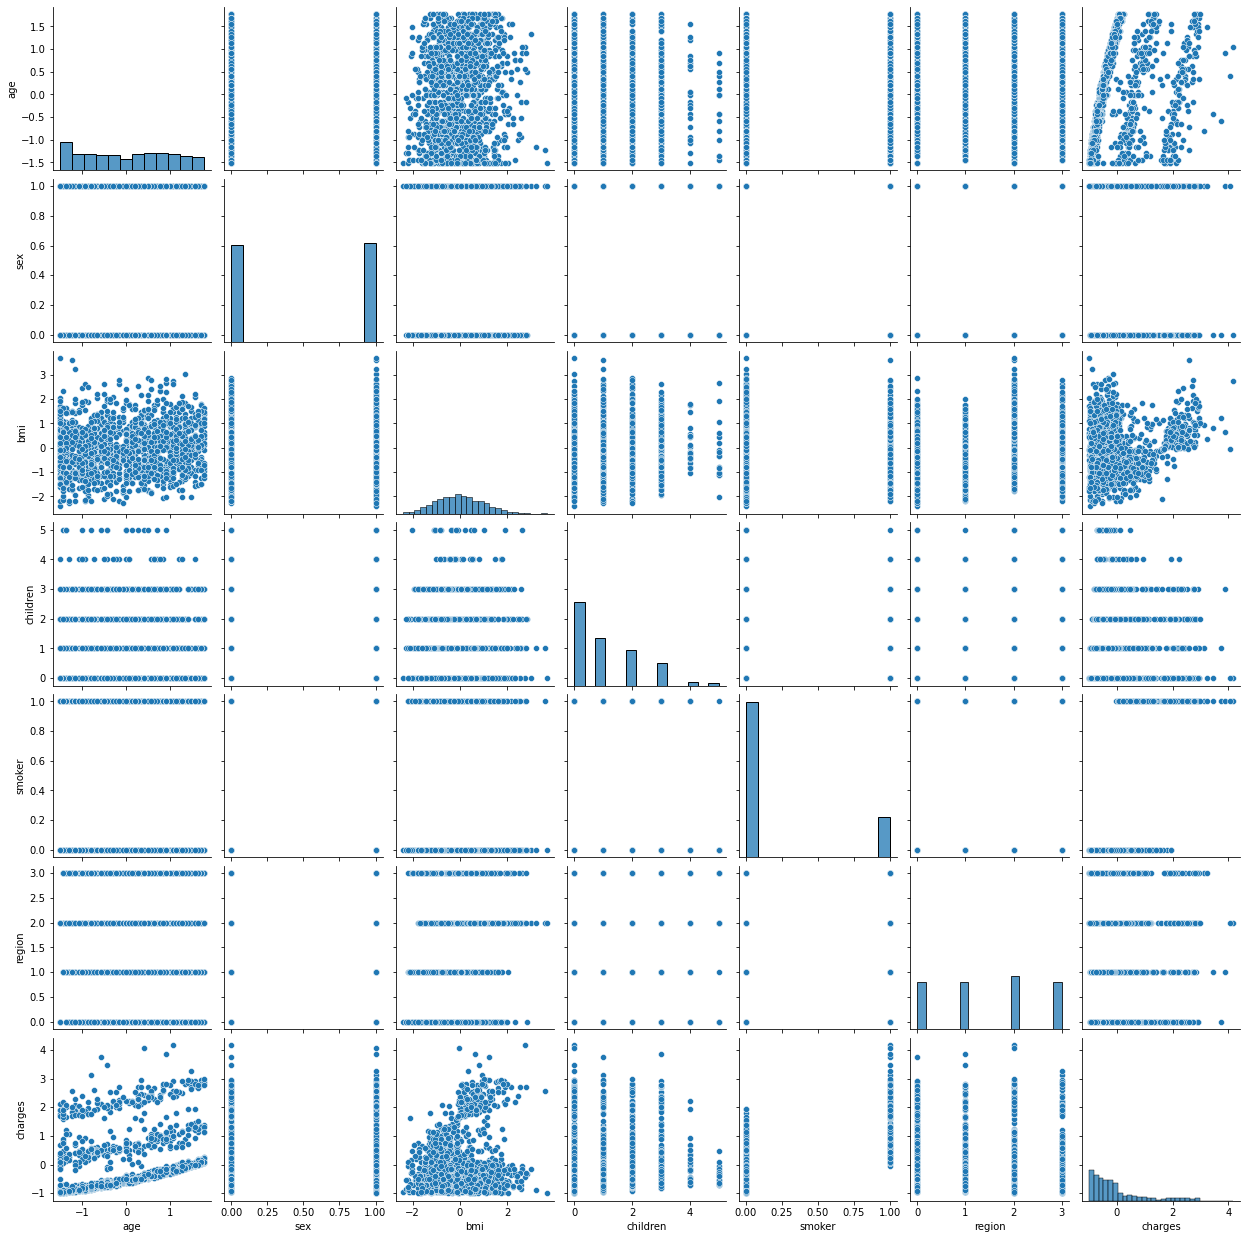

In [24]:
sns.pairplot(Xprep)

<AxesSubplot:>

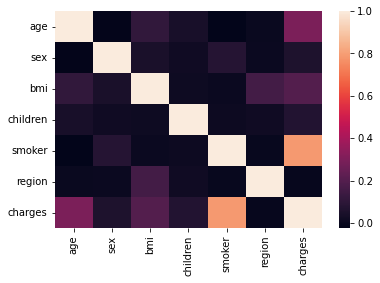

In [25]:
sns.heatmap(Xprep.corr())

In [26]:
y = Xprep.iloc[:, 6].values
X = Xprep.iloc[:, 0:6].values

In [27]:
y

array([ 0.2985838 , -0.95368917, -0.72867467, ..., -0.96159623,
       -0.93036151,  1.31105347])

In [28]:
X

array([[-1.43876426,  0.        , -0.45332   ,  0.        ,  1.        ,
         3.        ],
       [-1.50996545,  1.        ,  0.5096211 ,  1.        ,  0.        ,
         2.        ],
       [-0.79795355,  1.        ,  0.38330685,  3.        ,  0.        ,
         2.        ],
       ...,
       [-1.50996545,  0.        ,  1.0148781 ,  0.        ,  0.        ,
         2.        ],
       [-1.29636188,  0.        , -0.79781341,  0.        ,  0.        ,
         3.        ],
       [ 1.55168573,  0.        , -0.26138796,  0.        ,  1.        ,
         1.        ]])

<AxesSubplot:>

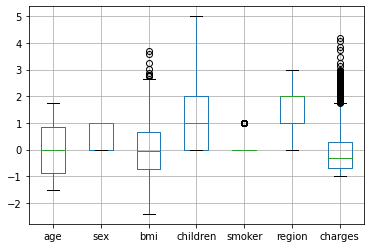

In [29]:
Xprep.boxplot()

Step 5:

Splits the data

In [30]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10
# train is now 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)

[[-1.50996545  0.          0.20613881  0.          0.          0.        ]
 [-1.36756307  0.         -1.35228375  0.          1.          1.        ]
 [-0.51314879  1.         -0.41723022  4.          1.          1.        ]
 ...
 [-1.43876426  1.         -0.46398289  0.          0.          1.        ]
 [ 0.19886312  0.         -0.66657783  0.          1.          1.        ]
 [-0.65555117  0.         -1.75747362  3.          0.          1.        ]] [[-1.43876426e+00  0.00000000e+00  2.37307260e-01  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 1.69408811e+00  0.00000000e+00  1.01487810e+00  0.00000000e+00
   0.00000000e+00  2.00000000e+00]
 [ 5.54869066e-01  1.00000000e+00 -1.36714155e-01  3.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-7.97953548e-01  1.00000000e+00  1.21337192e+00  0.00000000e+00
   0.00000000e+00  2.00000000e+00]
 [-3.70746407e-01  0.00000000e+00  2.06138809e-01  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [-5.13148787e-01  1.00000000e+00 -4.63

Step 6.1:

Trains the models and gets their scores and prints them below each model

In [42]:
Treeparam_grid = {'max_depth':range(10,50,5),
                 'criterion':['mse','mae']} 

Treegrid = GridSearchCV(DecisionTreeRegressor(), Treeparam_grid, verbose=2, refit = True)



In [43]:
Treegrid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ........................criterion=mse, max_depth=10; total time=   0.0s
[CV] END ........................criterion=mse, max_depth=10; total time=   0.0s
[CV] END ........................criterion=mse, max_depth=10; total time=   0.0s
[CV] END ........................criterion=mse, max_depth=10; total time=   0.0s
[CV] END ........................criterion=mse, max_depth=10; total time=   0.0s
[CV] END ........................criterion=mse, max_depth=15; total time=   0.0s
[CV] END ........................criterion=mse, max_depth=15; total time=   0.0s
[CV] END ........................criterion=mse, max_depth=15; total time=   0.0s
[CV] END ........................criterion=mse, max_depth=15; total time=   0.0s
[CV] END ........................criterion=mse, max_depth=15; total time=   0.0s
[CV] END ........................criterion=mse, max_depth=20; total time=   0.0s
[CV] END ........................criterion=mse, 

D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and wi

D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 an

[CV] END ........................criterion=mae, max_depth=15; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=15; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=15; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=15; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=20; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=20; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=20; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=20; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=20; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=25; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=25; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=25; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 an

[CV] END ........................criterion=mae, max_depth=25; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=25; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=30; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=30; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=30; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=30; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=30; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=35; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=35; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=35; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=35; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=35; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 an

[CV] END ........................criterion=mae, max_depth=40; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=40; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=40; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=40; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=40; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=45; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=45; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=45; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=45; total time=   0.0s
[CV] END ........................criterion=mae, max_depth=45; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(10, 50, 5)},
             verbose=2)

In [44]:
print('The best parameters are %s with a score of %0.2f' 
      % (Treegrid.best_params_, Treegrid.best_score_))

The best parameters are {'criterion': 'mae', 'max_depth': 10} with a score of 0.69


In [96]:
Treemodel = DecisionTreeRegressor(criterion='mae',max_depth=10,random_state=0)
Treemodel.fit(x_train, y_train)
Tree_pred = Treemodel.predict(x_test)
Treescore = Treemodel.score(x_val,y_val)

D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


In [97]:
print(Treescore)

0.677023190429088


In [98]:
DTR2= r2_score(y_test,Tree_pred)
DTR2

0.899074721772739

In [67]:
print('MAE: ' + str(mean_absolute_error(y_test,Tree_pred)))

MAE: 0.1363226338311226


In [68]:
print('MSE: ' + str(mean_squared_error(y_test,Tree_pred)))

MSE: 0.11389602660107795


In [71]:
RFparam_grid = {'n_estimators':range(50,100,10),
                 'criterion':['mse','mae']} 

RFgrid = GridSearchCV(RandomForestRegressor(), RFparam_grid, verbose=2, refit = True)



In [72]:
RFgrid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................criterion=mse, n_estimators=50; total time=   0.0s
[CV] END .....................criterion=mse, n_estimators=50; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mse, n_estimators=50; total time=   0.0s
[CV] END .....................criterion=mse, n_estimators=50; total time=   0.0s
[CV] END .....................criterion=mse, n_estimators=50; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mse, n_estimators=60; total time=   0.0s
[CV] END .....................criterion=mse, n_estimators=60; total time=   0.0s
[CV] END .....................criterion=mse, n_estimators=60; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mse, n_estimators=60; total time=   0.0s
[CV] END .....................criterion=mse, n_estimators=60; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mse, n_estimators=70; total time=   0.0s
[CV] END .....................criterion=mse, n_estimators=70; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mse, n_estimators=70; total time=   0.0s
[CV] END .....................criterion=mse, n_estimators=70; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mse, n_estimators=70; total time=   0.0s
[CV] END .....................criterion=mse, n_estimators=80; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mse, n_estimators=80; total time=   0.0s
[CV] END .....................criterion=mse, n_estimators=80; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mse, n_estimators=80; total time=   0.0s
[CV] END .....................criterion=mse, n_estimators=80; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mse, n_estimators=90; total time=   0.0s
[CV] END .....................criterion=mse, n_estimators=90; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mse, n_estimators=90; total time=   0.0s
[CV] END .....................criterion=mse, n_estimators=90; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mse, n_estimators=90; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=50; total time=   0.3s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=50; total time=   0.3s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=50; total time=   0.3s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=50; total time=   0.3s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=50; total time=   0.3s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=60; total time=   0.4s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=60; total time=   0.4s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=60; total time=   0.4s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=60; total time=   0.4s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=60; total time=   0.4s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=70; total time=   0.5s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=70; total time=   0.5s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=70; total time=   0.5s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=70; total time=   0.5s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=70; total time=   0.5s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=80; total time=   0.6s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=80; total time=   0.6s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=80; total time=   0.6s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=80; total time=   0.6s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=80; total time=   0.6s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=90; total time=   0.7s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=90; total time=   0.7s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=90; total time=   0.7s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=90; total time=   0.7s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END .....................criterion=mae, n_estimators=90; total time=   0.7s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'n_estimators': range(50, 100, 10)},
             verbose=2)

In [74]:
print('The best parameters are %s with a score of %0.2f' 
      % (RFgrid.best_params_, RFgrid.best_score_))

The best parameters are {'criterion': 'mae', 'n_estimators': 70} with a score of 0.81


In [99]:
RFmodel = RandomForestRegressor(n_estimators=70,criterion='mae',random_state=0)
RFmodel.fit(x_train, y_train)
RF_pred = RFmodel.predict(x_test)
RFscore = RFmodel.score(x_val,y_val)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


In [100]:
print(RFscore)

0.8305752967988863


In [101]:
RFR2= r2_score(y_test,RF_pred)
RFR2

0.9354004707848765

In [78]:
print('MAE: ' + str(mean_absolute_error(y_test,RF_pred)))

MAE: 0.15231263086922733


In [79]:
print('MSE: ' + str(mean_squared_error(y_test,RF_pred)))

MSE: 0.07290175293185798


In [80]:
SVRparam_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf','linear']}


SVRgrid = GridSearchCV(SVR(), SVRparam_grid, verbose=2, refit = True)



In [81]:
SVRgrid.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.1s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.1s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ...................

[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   9.8s
[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   9.9s
[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   9.8s
[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   8.6s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   9.8s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   9.6s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   9.9s
[CV] END ...................

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [83]:
print('The best parameters are %s with a score of %0.2f' 
      % (SVRgrid.best_params_, SVRgrid.best_score_))

The best parameters are {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'} with a score of 0.83


In [84]:
reg = SVR(kernel='rbf', C = 1000, gamma = 0.01, epsilon=0.1)
reg.fit(x_train, y_train)
SVR_pred = reg.predict(x_test)
SVRscore = reg.score(x_val,y_val)

In [85]:
print(SVRscore)

0.8559569520207952


In [86]:
SVRR2= r2_score(y_test,SVR_pred)
SVRR2

0.9020633991810638

In [87]:
print('MAE: ' + str(mean_absolute_error(y_test,RF_pred)))

MAE: 0.15231263086922733


In [88]:
print('MSE: ' + str(mean_squared_error(y_test,RF_pred)))

MSE: 0.07290175293185798


Random Forest seems to have done the best juding by the scores, however SVR also did pretty well but Decision Trees ended up lacking a bit